In [1]:
intrate = read.csv("InterestRate.csv",header=T) 
intrate.ts = ts(intrate$INT,start=1950, freq=12)
dates = as.Date(intrate[,1], format="%m/%d/%Y")
unemploym = read.csv("MonthlyUnemployment.csv",header=T)

In [2]:
unemploym = as.vector(t(unemploym[,-1]))
unemploym.ts = ts(unemploym[-c(809:816)],start=1950, freq=12)
data.ts = ts.union(intrate.ts,unemploym.ts)

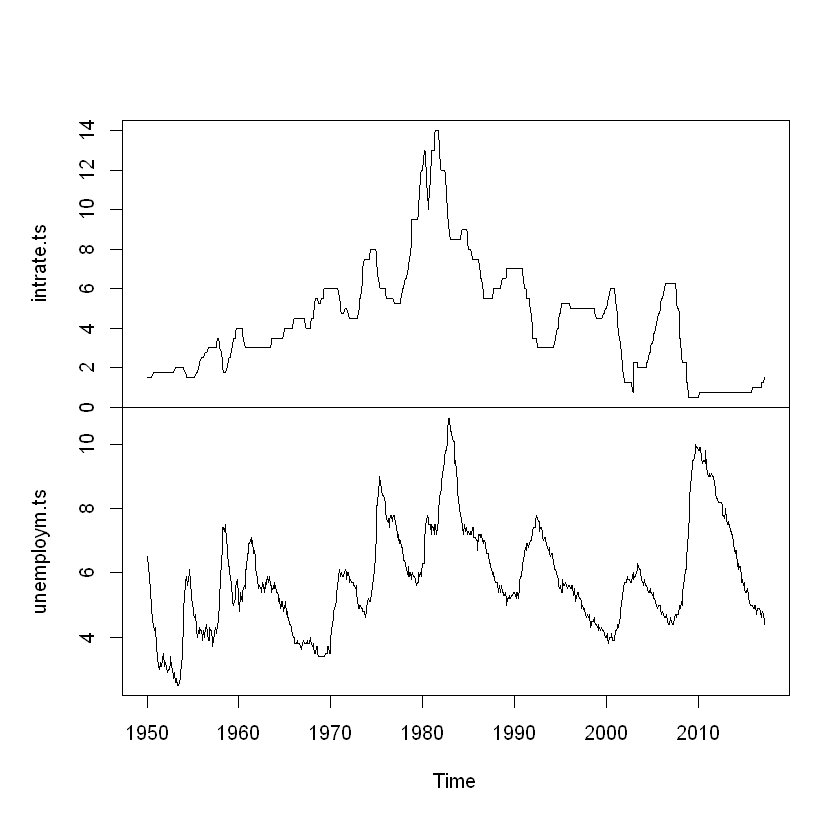

In [3]:
plot(data.ts, type="l",main="")

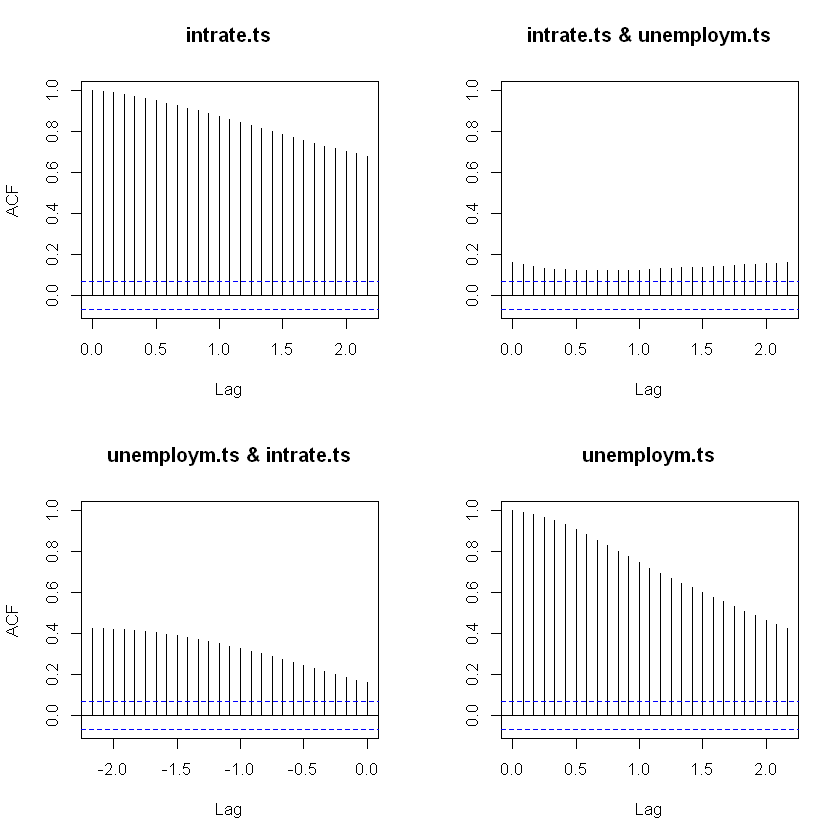

In [4]:
acf(data.ts)

Neither of time series: unemployment or interest rate are stationary since ACF decreases slowly.

Lowerleft cross ACF plot reflects cross correlation between Unemployment at time t and interest rate at time t-k where k(>0) are lags and -k has been reflected on the x axis. <br> Clearly the interest rate is the lead time series(check ppt theory and video). Note the lags on x axis are negative and are for interest rate. <BR><br>
Its easy to interpret autocorrealtion between interest rate(time t) and interest rate(time t+k). It decays but is positive means there is positive correlation between time @ t and time @ t+k also seen by Yule-walkner equations. This means that interest rate at time t has already seen a positive peak well before at time t+k. Thus interest rate at time t is leading. 
    
Now, just replace interest rate(time t+k) with unemployment time series. Thus we have same decaying pattern in ACF for: <br>
<li> correlation between interest rate (time t) and unemployment (time t+k), or equivalently <br> <li>
correlation between unemployment (time t) and interest rate (time t-k)  [Lower left graph]
<br>
    Hence interest rate will lead unemployment
    
    

In [6]:
## Contemporareous lag correlation
n = length(intrate.ts)
cor(intrate.ts,unemploym.ts)
## lag-one correlation
cor(intrate.ts[1:(n-1)],unemploym.ts[2:n])
cor(intrate.ts[2:n],unemploym.ts[1:(n-1)])

[1] 0.160546

[1] 0.1732577

[1] 0.1493509

<center><h2> cor(Y<sub>1t</sub>, Y<sub>2t</sub>) = 0.16 <br><br>
   <center> cor(Y<sub>1(t-1)</sub>, Y<sub>2t</sub>) = 0.17 <br><br>
    <center>cor(Y<sub>1t</sub>, Y<sub>2(t-1)</sub>) = 0.14

Differencing:

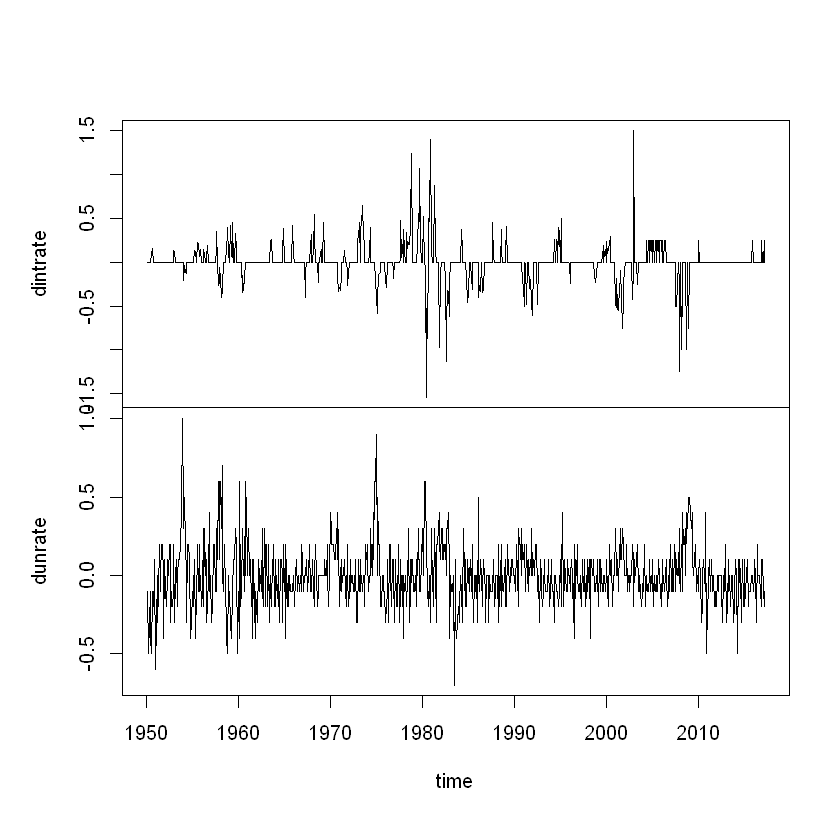

In [7]:
# take the first order difference
dunrate=diff(unemploym.ts)
dintrate=diff(intrate.ts)
ddata.ts = ts.union(dintrate,dunrate)
plot(ddata.ts,xlab="time",main="",type="l")

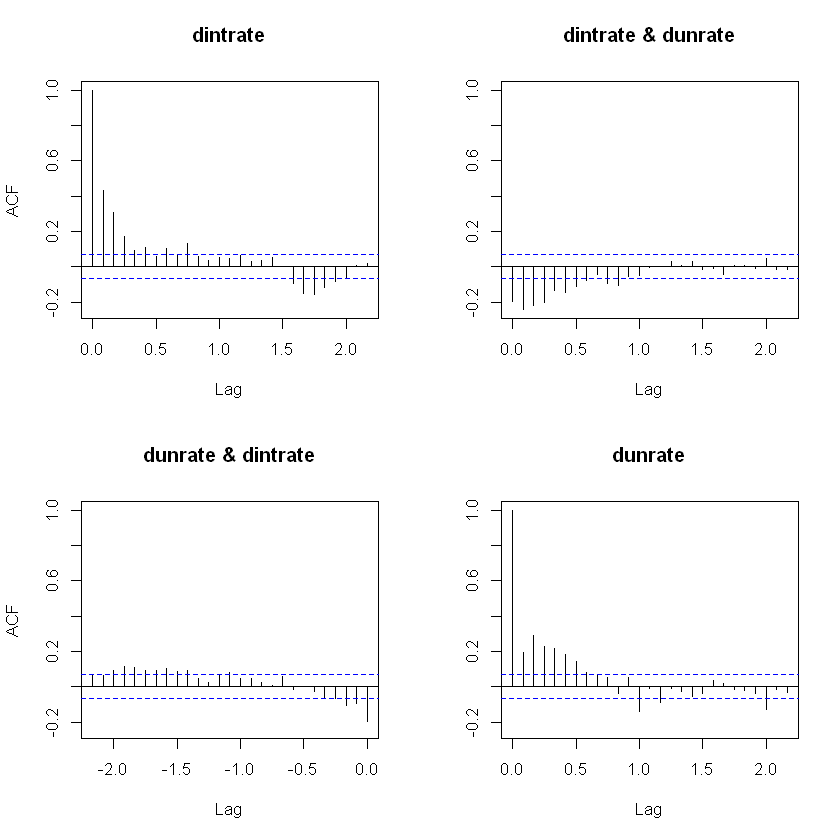

In [8]:
acf(ddata.ts)

<li>
    [lowerleft] No significant lead by diff_interest rate over diff_unemployment rate. But contemporarious (lag 0) is negative. <br> <br> <li>
[upperright] Significant lead by diff_unemployment rate over diff_interest rate but in negative sense. This is also supported by theory ie if diff_unemployment rate increases then its followed by a (lagged) negative diff_interest rate (Done by central bank)

### See explanation document still once.

In [9]:
cor(dunrate,dintrate)
## lag-one correlation
cor(dunrate[1:(n-2)], dintrate[2:(n-1)])
cor(dunrate[1:(n-2)],dintrate[2:(n-1)])

[1] -0.1972198

[1] -0.242917

[1] -0.242917

In [10]:
## Fit Univariate AR Models to difference processes 
mod_un = ar(dunrate,order.max=20)
print(mod_un$order)
mod_int = ar(dintrate,order.max=20)
print(mod_int$order)

[1] 12
[1] 20


In [11]:
## Fit VAR model: capture relationship between change in interest rate vs change in unemplyment
library(vars)
mod_aic_1 = VAR(ddata.ts,lag.max=20,ic="AIC", type="none")
mod_aic_2 = VAR(ddata.ts,lag.max=20,ic="AIC", type="const")
mod_aic_3 = VAR(ddata.ts,lag.max=20,ic="AIC", type="trend")
mod_aic_4 = VAR(ddata.ts,lag.max=20,ic="AIC", type="both")

Warning message:
"package 'vars' was built under R version 3.6.3"Loading required package: MASS
Warning message:
"package 'MASS' was built under R version 3.6.3"Loading required package: strucchange
Warning message:
"package 'strucchange' was built under R version 3.6.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Warning message:
"package 'sandwich' was built under R version 3.6.3"Loading required package: urca
Warning message:
"package 'urca' was built under R version 3.6.3"Loading required package: lmtest
Warning message:
"package 'lmtest' was built under R version 3.6.3"

In [12]:
pord_1 = mod_aic_1$p
pord_2 = mod_aic_2$p
pord_3 = mod_aic_3$p
pord_4 = mod_aic_4$p
#all select VAR order as 12
print(pord_1)
print(pord_2)
print(pord_3)
print(pord_4)

AIC(n) 
    12 
AIC(n) 
    12 
AIC(n) 
    12 
AIC(n) 
    12 


In [13]:
#with other Information criterion
mod_hq = VAR(ddata.ts,lag.max=20,ic="HQ")
mod_sc = VAR(ddata.ts,lag.max=20,ic="SC")
mod_fpe = VAR(ddata.ts,lag.max=20,ic="FPE")
pord_hq = mod_hq$p; 
pord_sc = mod_sc$p; 
pord_fpe = mod_fpe$p
print(pord_hq)
print(pord_sc)
print(pord_fpe)

HQ(n) 
    2 
SC(n) 
    2 
FPE(n) 
    12 


In [14]:
## Fit VAR Model with Selected Order=12 from AIC
mod = VAR(ddata.ts,pord_4, type="both")
summary(mod)


VAR Estimation Results:
Endogenous variables: dintrate, dunrate 
Deterministic variables: both 
Sample size: 795 
Log Likelihood: 464.093 
Roots of the characteristic polynomial:
0.8992 0.8992 0.8935 0.8935 0.8828 0.8828 0.843 0.8405 0.8405 0.8335 0.8335 0.8223 0.8223 0.8129 0.8129 0.7931 0.7931 0.7819 0.7819 0.7389 0.7389 0.7381 0.7381 0.5686
Call:
VAR(y = ddata.ts, p = pord_4, type = "both")


Estimation results for equation dintrate: 
dintrate = dintrate.l1 + dunrate.l1 + dintrate.l2 + dunrate.l2 + dintrate.l3 + dunrate.l3 + dintrate.l4 + dunrate.l4 + dintrate.l5 + dunrate.l5 + dintrate.l6 + dunrate.l6 + dintrate.l7 + dunrate.l7 + dintrate.l8 + dunrate.l8 + dintrate.l9 + dunrate.l9 + dintrate.l10 + dunrate.l10 + dintrate.l11 + dunrate.l11 + dintrate.l12 + dunrate.l12 + const + trend 

               Estimate Std. Error t value Pr(>|t|)    
dintrate.l1   3.302e-01  3.631e-02   9.092  < 2e-16 ***
dunrate.l1   -1.693e-01  3.801e-02  -4.455 9.64e-06 ***
dintrate.l2   1.234e-01  3.831e-

Note till order 2 in both equations are only significant.

In [15]:
## Residual Analysis: Constant Variance Assumption
arch.test(mod)


	ARCH (multivariate)

data:  Residuals of VAR object mod
Chi-squared = 126.16, df = 45, p-value = 1.261e-09

$arch.mul

	ARCH (multivariate)

data:  Residuals of VAR object mod
Chi-squared = 126.16, df = 45, p-value = 1.261e-09



Reject null hypothesis of constant variance. there is time varying volatility or heteroscedasticity.

In [16]:
## Residual Analysis: Normality Assumption
normality.test(mod)

$JB

	JB-Test (multivariate)

data:  Residuals of VAR object mod
Chi-squared = 8787, df = 4, p-value < 2.2e-16


$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object mod
Chi-squared = 33.126, df = 2, p-value = 6.408e-08


$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object mod
Chi-squared = 8753.9, df = 2, p-value < 2.2e-16


$jb.mul
$jb.mul$JB

	JB-Test (multivariate)

data:  Residuals of VAR object mod
Chi-squared = 8787, df = 4, p-value < 2.2e-16


$jb.mul$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object mod
Chi-squared = 33.126, df = 2, p-value = 6.408e-08


$jb.mul$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object mod
Chi-squared = 8753.9, df = 2, p-value < 2.2e-16




Reject NULL hypothesis of Normality.

In [17]:
## Residual Analysis: Uncorrelated Errors Assumption
serial.test(mod)
serialtest = serial.test(mod)


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object mod
Chi-squared = 16.709, df = 16, p-value = 0.4047

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object mod
Chi-squared = 16.709, df = 16, p-value = 0.4047



Fail to reject NULL hypothesis of uncorrelated residuals. Hence the residuals are uncorrelated.

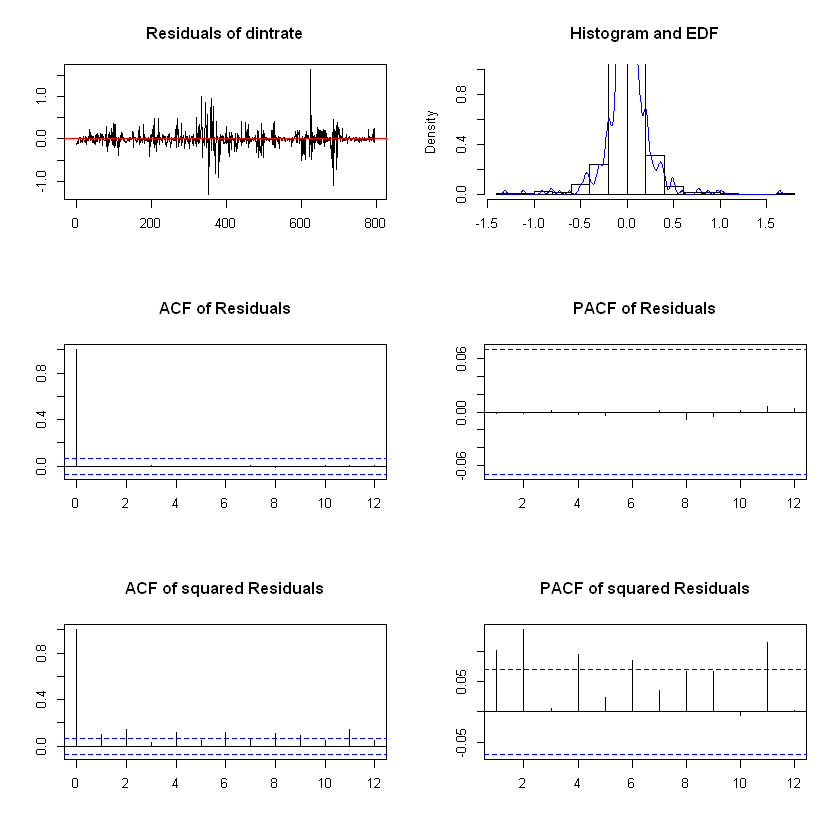

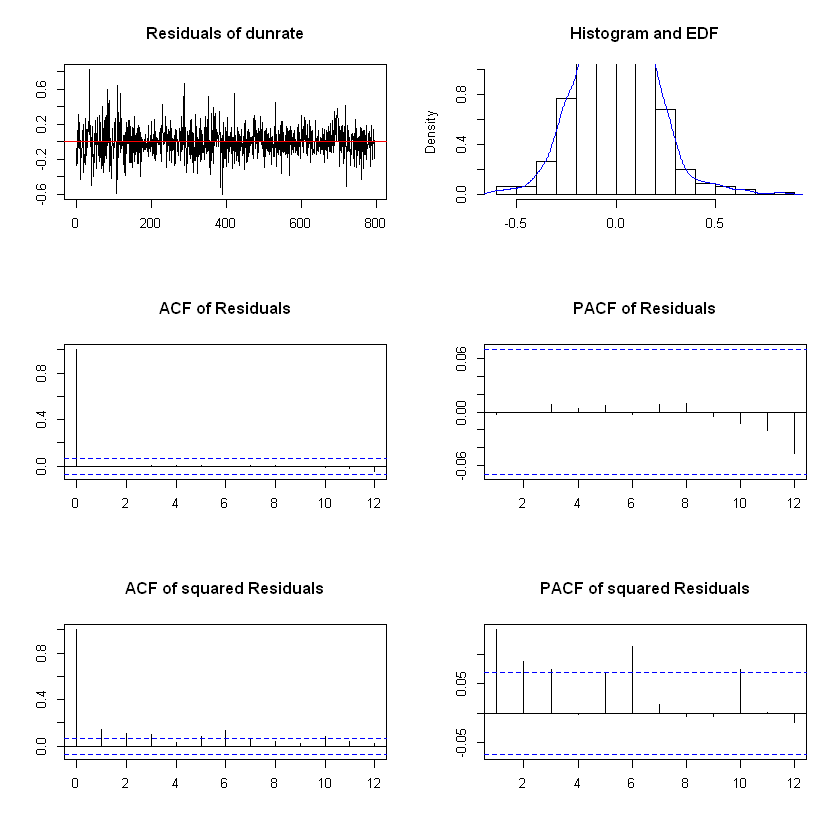

In [18]:
plot(serialtest)

all tests indicate somewhat(or not?) normal residual

In [19]:
## roots analysis: is this VAR process stable?
roots_mod = roots(mod)
sum(roots_mod>=1)

[1] 0

Stable VAR as eigenvalues less than 1

### Wald Test

In [20]:
## Does a smaller order fit the model equally well?  Apply Wald Test
## Coefficients for orders 3 to 12
coef.dintrate.3to12 = coefficients(mod)$dintrate[5:(2*pord_4),1]
coef.dunrate.3to12 = coefficients(mod)$dunrate[5:(2*pord_4),1]
## Covariance matrix of the coefficients
index.dintrate = 5:(2*pord_4)
var.dintrate.3to12 = vcov(mod)[index.dintrate,index.dintrate]
index.dunrate = c(((2*pord_4)+6):(4*pord_4+1))
var.dunrate.3to12 = vcov(mod)[index.dunrate,index.dunrate]
## Apply Wald Test
library(aod)
wald.test(b=coef.dintrate.3to12, var.dintrate.3to12, Terms=seq(1, 2*(pord_4-2)))
wald.test(b=coef.dunrate.3to12, var.dunrate.3to12, Terms=seq(1, 2*(pord_4-2)))

Warning message:
"package 'aod' was built under R version 3.6.3"

Wald test:
----------

Chi-squared test:
X2 = 36.1, df = 20, P(> X2) = 0.015

Wald test:
----------

Chi-squared test:
X2 = 66.4, df = 20, P(> X2) = 7e-07

can reject null hypothesis for 5% confidence. A larger order is necessary. 